In [3]:
import pynsx as nsx
import math
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import convolve2d

In [4]:
def coords(width, height):
    x = np.linspace(0, width, num=width) - width/2.0
    y = np.linspace(0, height, num=height) - height/2.0
    return np.meshgrid(x, y)

def kernels(r, sigma):
    x, y = coords(30, 30)
    rr = x**2 + y**2
    
    peak_kernel = np.exp(-0.5*rr/sigma**2)
    bkg_kernel = np.exp(-0.5 * (np.sqrt(rr)-r)**2 / sigma**2)
    
    peak_kernel /= peak_kernel.sum()
    bkg_kernel /= bkg_kernel.sum()
    
    return peak_kernel, bkg_kernel


In [5]:
expt = nsx.Experiment('test', 'BioDiff2500')
biodiff = expt.getDiffractometer()
reader = nsx.HDF5DataReader("/home/jonathan/data/biodiff/p11202/p11202_new.hdf", biodiff)
data = nsx.DataSet(reader, biodiff)
expt.addData(data)

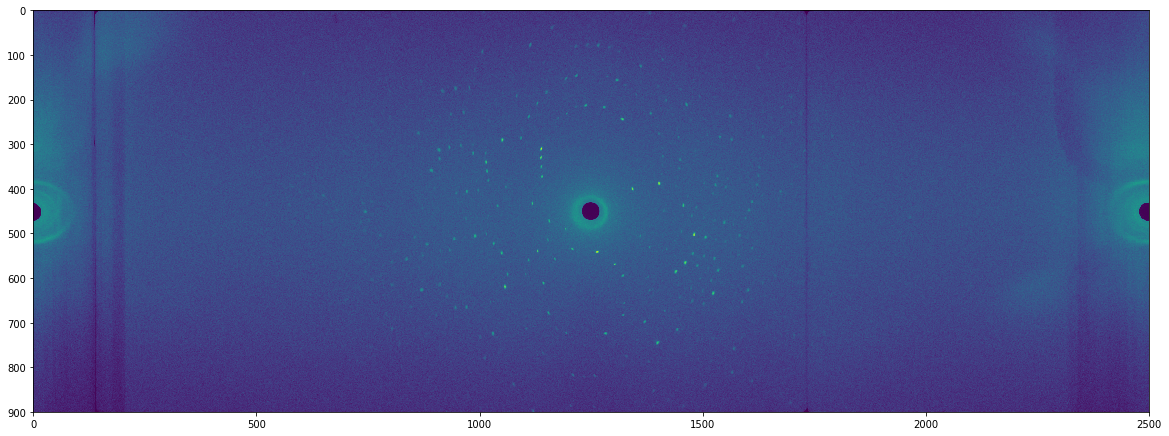

In [6]:
plt.figure(figsize=(20,10))
plt.imshow(np.log(data.frame(0)))
#plt.imshow(data.frame(0))
plt.show()

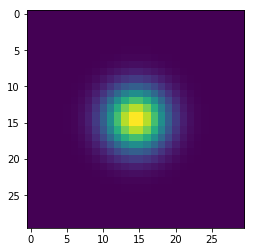

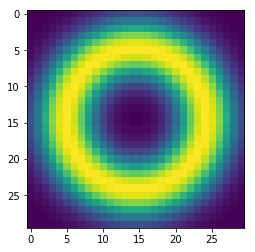

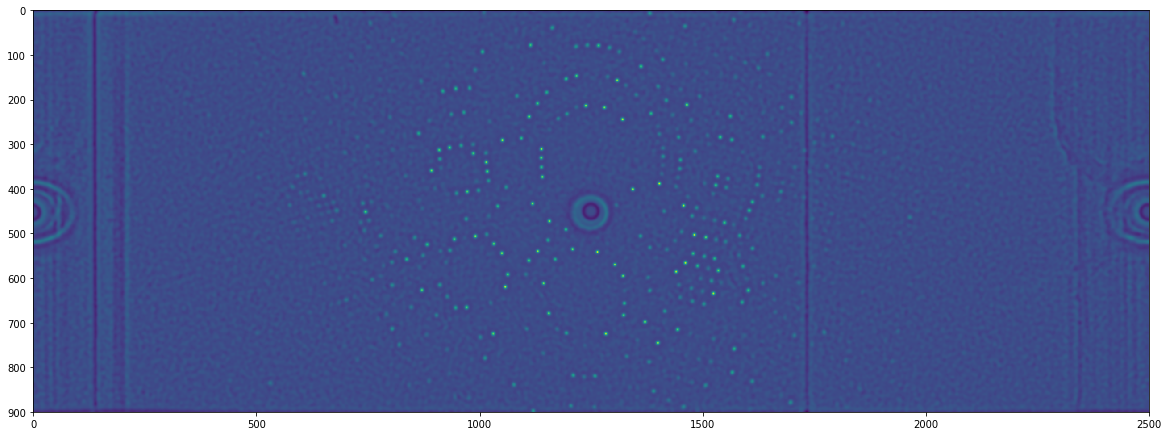

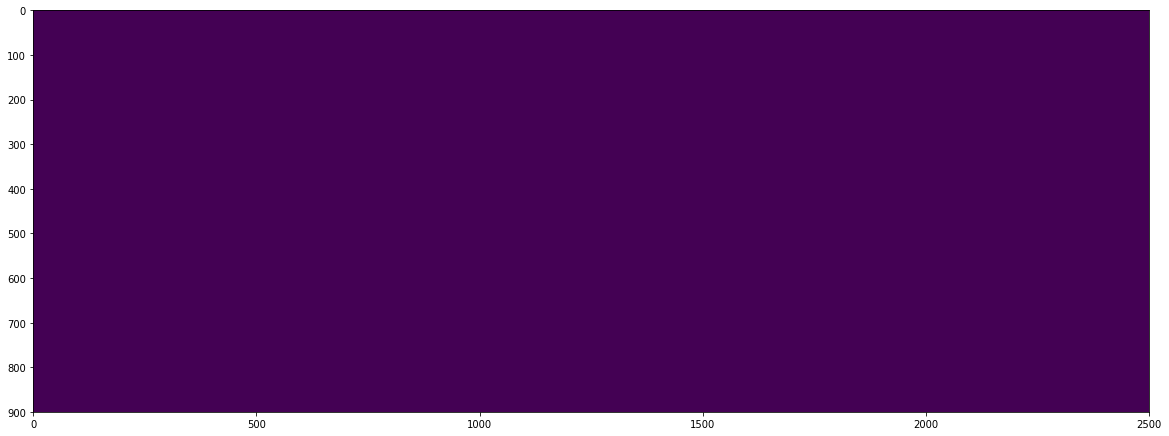

In [7]:
image = data.frame(0)

peak, bkg = kernels(10, 3)

plt.imshow(peak)
plt.show()

plt.imshow(bkg)
plt.show()

peak_conv = convolve2d(image, peak, mode='same', boundary='wrap')
bkg_conv = convolve2d(image, bkg, mode='same', boundary='wrap')
bkg2_conv = convolve2d((image-bkg_conv)**2, bkg, mode='same', boundary='wrap')

rel = (peak_conv - bkg_conv) / np.sqrt(bkg2_conv)

plt.figure(figsize=(20,20))
plt.imshow(rel)
plt.show()




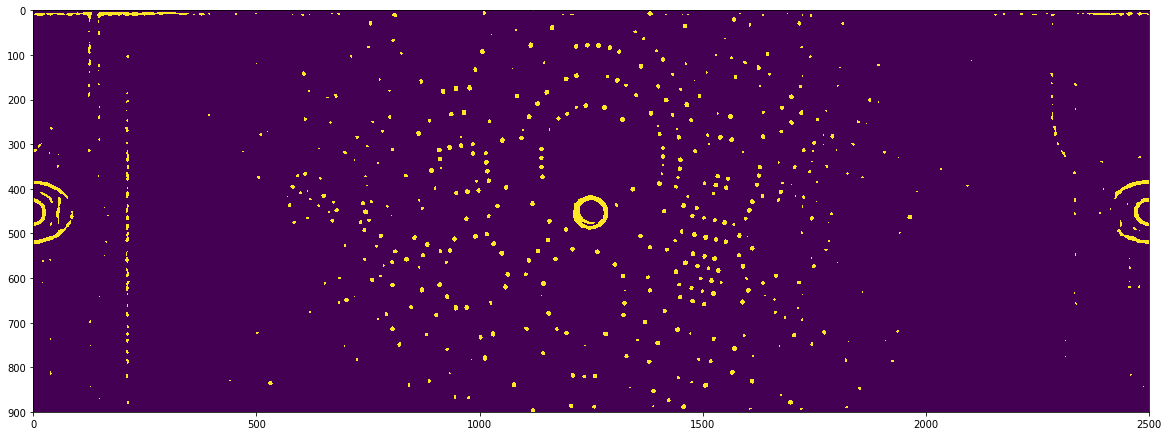

In [13]:
plt.figure(figsize=(20,20))
plt.imshow(rel > 0.5)
plt.show()

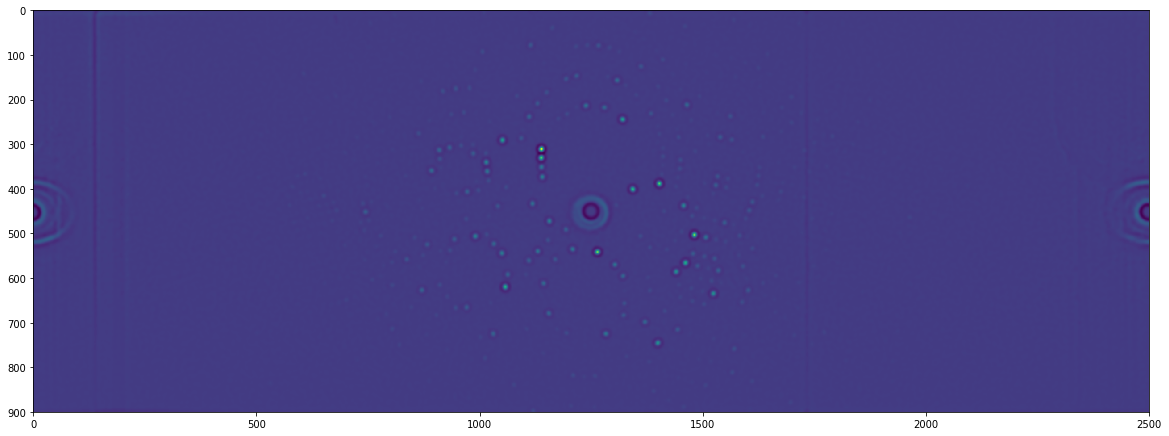

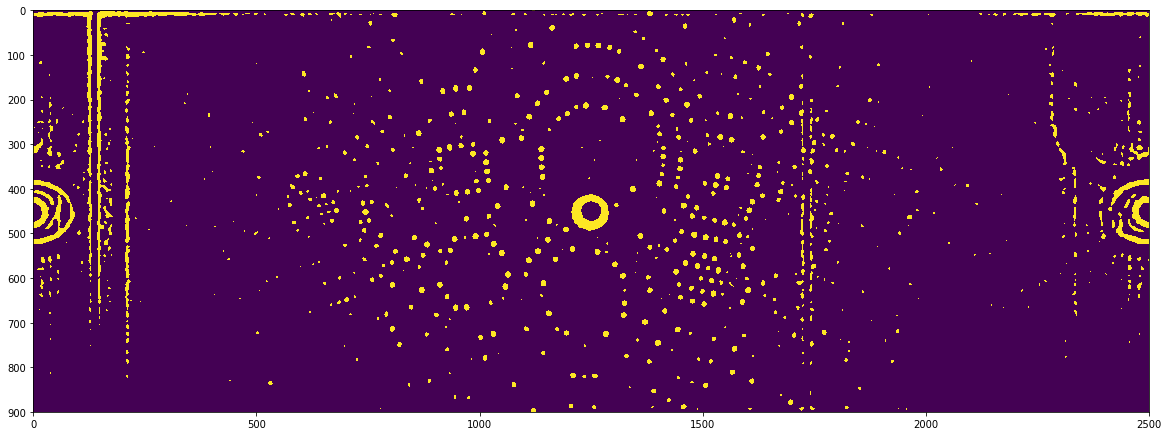

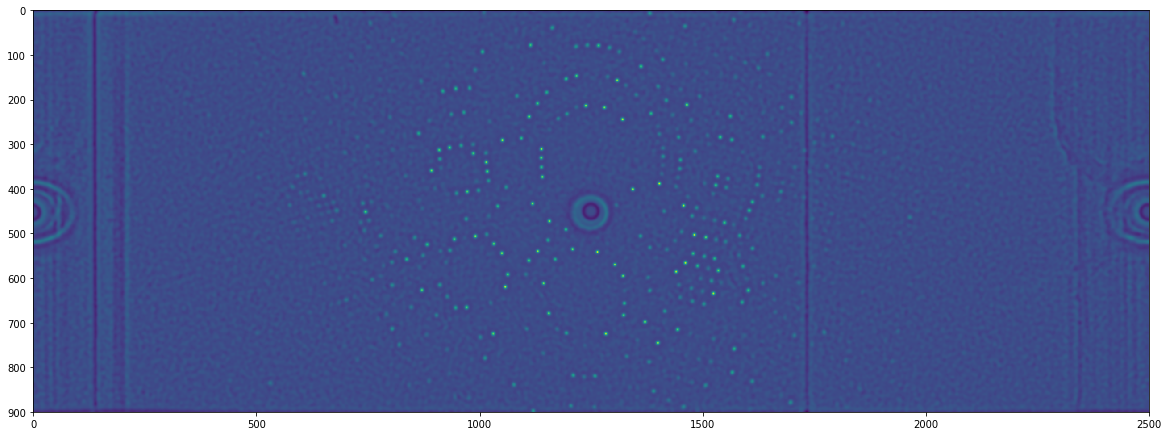

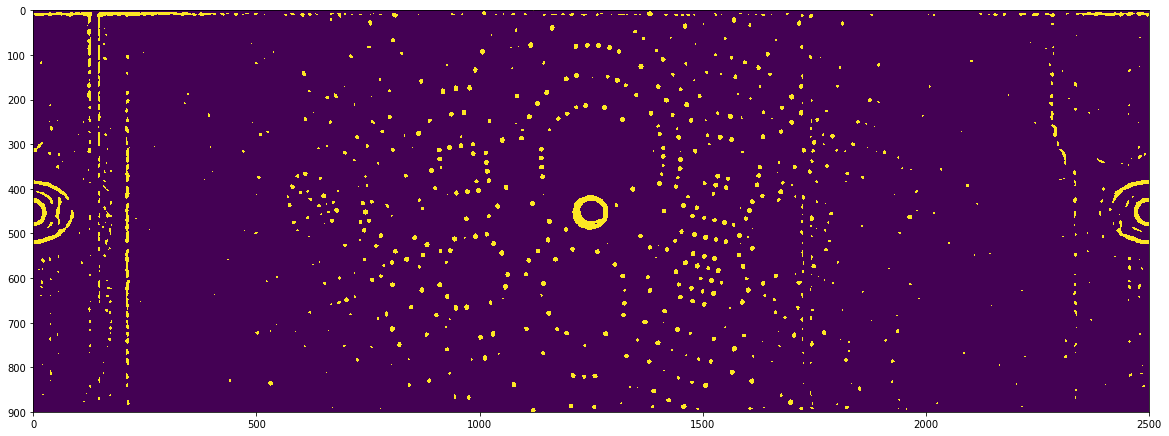

In [14]:
plt.figure(figsize=(20,20))
plt.imshow(peak_conv-bkg_conv)
plt.show()

plt.figure(figsize=(20,20))
plt.imshow((peak_conv-bkg_conv) > 20)
plt.show()

plt.figure(figsize=(20,20))
plt.imshow(rel)
plt.show()

plt.figure(figsize=(20,20))
plt.imshow(rel > 0.4)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(rel > 2.0)
plt.show()

In [ ]:
help(nsx.PeakIntegrator)

In [ ]:
[1,2,3,4][-1:]

In [ ]:
nsx.PeakCalc(peaks[0])

In [ ]:
compute_statistics(peaks, nsx.SpaceGroup("P 21 21 21"), True)

In [ ]:
high_q_peaks = []

for peak in peaks:
    if peak.isSelected() == False:
        continue
    if 1.0 / np.linalg.norm(peak.getQ()) < 2.1:
        high_q_peaks.append(peak)
        
print(len(high_q_peaks))
print(compute_statistics(peaks, nsx.SpaceGroup("P 21 21 21"), True))

In [ ]:
for i in range(1):
    print('------------------------------------------')
    print(num_selected_peaks(data.getPeaks()))
    filter_peaks(data.getPeaks())
    remove_deselected(data)
    print(num_selected_peaks(data.getPeaks()))
    predict_peaks(data)
    print(num_selected_peaks(data.getPeaks()))
    print(compute_statistics(data.getPeaks(), nsx.SpaceGroup("P 21 21 21"), True))

In [ ]:
dmin = 2.1
dmax = 48.0

good_peaks = []
all_peaks = data.getPeaks()
filter_peaks(all_peaks)

for peak in all_peaks:
    if not peak.isSelected():
        continue
        
    d = 1.0 / np.linalg.norm(peak.getQ())
    if d >= dmin and d <= dmax:
        good_peaks.append(peak)
          
print(len(all_peaks))
print(len(good_peaks))

compute_statistics(good_peaks, nsx.SpaceGroup("P 21 21 21"), True)

In [ ]:
merged = nsx.MergedData(nsx.SpaceGroup("P 21 21 21"), True)

for peak in good_peaks:
    if peak.isSelected():
        merged.addPeak(nsx.PeakCalc(peak))
        
p = []
q = []
        
for peak in merged.getPeaks():
    p.append(peak.chi2()) 
    [[h, k, l]] = peak.getIndex()
    q.append(1.0 / uc.getD(int(h),int(k),int(l)))
        
    
plt.figure(figsize=(15,15))
plt.scatter(q, p, s=0.2)
plt.show()

In [ ]:
peak = merged.getPeaks()[1]
raw_peaks = peak.getPeaks()

In [ ]:
print(raw_peaks)
print(type(raw_peaks))

In [ ]:
help(nsx.PeakCalc)

In [ ]:
help(uc)

In [ ]:
peak.getIndex()

In [ ]:
peaks = data.getPeaks()
qs = []

for peak in peaks:
    qs.append(peak.getQ()[0])
    
xs = [ q[0] for q in qs ]
ys = [ q[1] for q in qs ]
zs = [ q[2] for q in qs ]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs, s=0.1)
plt.show()
      

In [ ]:
hs = []
ks = []
ls = []
error = []
frame = []

the_peaks = [peaks[0]]

for peak in peaks:
    if not peak.isSelected():
        continue
    
    center = peak.getShape().getAABBCenter().transpose()[0]
    
    q = peak.getQ()
    hkl = peak.getMillerIndices()[0]
    
    uc = peak.activeUnitCell()
    g = uc.getMetricTensor()
    
    real_hkl = uc.fromReciprocalStandard(q)[0]
    
    d = real_hkl-hkl
    
    if (np.linalg.norm(d) > 0.5):
        continue
    
    #print(hkl)
    #print(real_hkl)
    
    hs.append(d[0])
    ks.append(d[1])
    ls.append(d[2])
    error.append(np.linalg.norm(d))
    frame.append(center[2])

In [ ]:
plt.figure(figsize=(15,15))
#plt.scatter(frame, hs, s=0.5, color='r')
#plt.scatter(frame, ks, s=0.5, color='g')
#plt.scatter(frame, ls, s=0.5, color='b')
plt.scatter(frame, error, s=0.5, color='b')
plt.show()